# FERM 536 – Demystifying Turkish Economic Data  - Final Project
# - Project by: N. Emir Eğilli, Burak Kargın, Z. Yiğit Atalay, S. Mert Şengün
# Constructing a Coincident Economic Indicator for Turkey

## - Using several high frequency (weekly and monthly) try to construct a coincident index to track the state of the economy in real time. The coincident index can be used to forecast or nowcast QoQ real GDP growth (ie., chain-linked) and its major components.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
file_path = "FinalProject_data.xlsx"
data = pd.read_excel(file_path)

gdp_data = pd.read_excel(file_path, sheet_name='GDP QoQ', index_col='Date')
input_data= pd.read_excel(file_path, sheet_name='Input M', index_col='Date')

In [3]:
input_data.describe()

,Unemployment_Rate_SA,Consumer_Confidence_SA,CPI,Industrial_Production_Index_SA,Retail_Trade_SA,Avg_USD
count,228.000000,228.000000,228.000000,228.000000,167.000000,228.000000
mean,0.104504,-0.093333,0.012750,0.005266,0.006635,0.014447
std,0.016431,2.699421,0.018440,0.036292,0.029261,0.043832
min,0.080000,-12.100000,-0.014429,-0.293152,-0.200139,-0.080239
25%,0.091000,-1.525000,0.003714,-0.008164,-0.003502,-0.010561
50%,0.101500,0.100000,0.008566,0.004991,0.008466,0.008375
75%,0.115250,1.625000,0.016538,0.019031,0.017758,0.029091
max,0.141000,9.200000,0.135755,0.186611,0.158842,0.254687


### COMMENTS:

- Unemployment Rate (Seasonally Adjusted): Fluctuates between 8% and 14.1%, with a mean around 10.45%. The median higher than the mean suggests slight skewness towards higher rates.

- Consumer Confidence (Seasonally Adjusted): Ranges widely from -12.1 to 9.2 with a mean near -0.093, indicating overall negative sentiment but with significant variability.

- Consumer Price Index (CPI): Shows an average increase of 1.27% per period, reflecting inflationary trends, with some periods of deflation.

- Industrial Production Index (Seasonally Adjusted): Slightly increases on average by 0.53% per period, with a broad range that includes a significant drop of nearly 29.3%.

- Average USD Exchange Rate: Indicates an average increase of 1.44% per period, pointing to a depreciating Lira with high volatility.

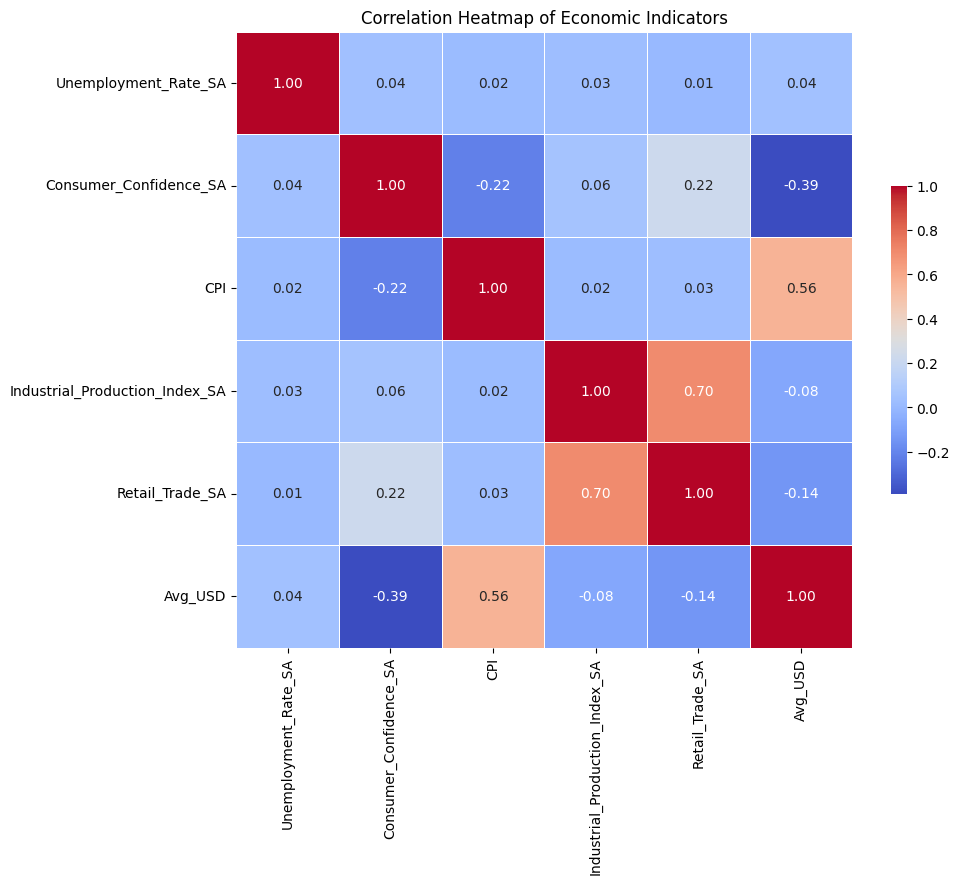

In [4]:
# Calculating the correlation matrix
corr_matrix = input_data.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Economic Indicators')
plt.show()

### COMMENTS: 

- The heatmap shows how different economic indicators relate to each other. Strong correlations, either positive (close to 1) or negative (close to -1), highlight closely linked indicators, such as Industrial Production and Exports. 
- Weak correlations (close to 0) suggest little to no linear relationship. These insights help identify key variables that could significantly influence or reflect the state of the economy when constructing a coincident economic index.

## - You may construct several versions of coincident indicators using reasonable combination of these variables via z-scores and percent ranks.

In [5]:
from scipy.stats import zscore
from itertools import combinations

In [6]:
# Define all combinations of the variables taken three at a time
variable_combinations = list(combinations(input_data.columns, 3))

# Initialize a DataFrame to hold the coincident indicators
coincident_indicators = pd.DataFrame(index=input_data.index)

# Construct coincident indicators based on Z-scores
for combo in variable_combinations:
    data_subset = input_data[list(combo)]
    z_score_data = data_subset.apply(zscore)
    coincident_indicators[f'Coincident_Index_ZScore_{"_".join(combo)}'] = z_score_data.mean(axis=1)

# Construct coincident indicators based on percent ranks
for combo in variable_combinations:
    data_subset = input_data[list(combo)]
    percentile_data = data_subset.rank(pct=True)
    coincident_indicators[f'Coincident_Index_PercentRank_{"_".join(combo)}'] = percentile_data.mean(axis=1)
    
coincident_indicators

,Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_CPI,Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Industrial_Production_Index_SA,Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA,Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Avg_USD,Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Industrial_Production_Index_SA,Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Retail_Trade_SA,Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Avg_USD,Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Retail_Trade_SA,Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Avg_USD,Coincident_Index_ZScore_Unemployment_Rate_SA_Retail_Trade_SA_Avg_USD,...,Coincident_Index_PercentRank_Consumer_Confidence_SA_CPI_Industrial_Production_Index_SA,Coincident_Index_PercentRank_Consumer_Confidence_SA_CPI_Retail_Trade_SA,Coincident_Index_PercentRank_Consumer_Confidence_SA_CPI_Avg_USD,Coincident_Index_PercentRank_Consumer_Confidence_SA_Industrial_Production_Index_SA_Retail_Trade_SA,Coincident_Index_PercentRank_Consumer_Confidence_SA_Industrial_Production_Index_SA_Avg_USD,Coincident_Index_PercentRank_Consumer_Confidence_SA_Retail_Trade_SA_Avg_USD,Coincident_Index_PercentRank_CPI_Industrial_Production_Index_SA_Retail_Trade_SA,Coincident_Index_PercentRank_CPI_Industrial_Production_Index_SA_Avg_USD,Coincident_Index_PercentRank_CPI_Retail_Trade_SA_Avg_USD,Coincident_Index_PercentRank_Industrial_Production_Index_SA_Retail_Trade_SA_Avg_USD
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-0.479192,1.187325,-0.378835,-0.369578,0.959018,-0.721296,-0.597885,1.778481,1.068633,-0.556874,...,0.539474,0.311404,0.337719,0.741228,0.624269,0.438596,0.565789,0.507310,0.263158,0.692982
2005-02-01,-0.439065,-0.679422,-0.382581,-0.604367,-0.862608,-0.657360,-0.787553,-1.017896,-1.027910,-0.905312,...,0.250731,0.349781,0.260965,0.266447,0.205409,0.281798,0.135965,0.118421,0.151316,0.067982
2005-03-01,-0.628911,-0.685637,-0.790972,-0.618632,-0.514147,-0.533737,-0.447142,-0.618826,-0.503868,-0.518319,...,0.266813,0.303728,0.350146,0.185307,0.271199,0.310307,0.311404,0.355263,0.436404,0.317982
2005-04-01,-0.378307,-0.260815,-0.470093,-0.155891,-0.225898,-0.417717,-0.120973,-0.241480,-0.003482,-0.084092,...,0.502924,0.438596,0.554094,0.486842,0.586257,0.563596,0.583333,0.650585,0.660088,0.708333
2005-05-01,-0.389621,-0.139345,-0.265897,-0.241679,-0.388002,-0.638883,-0.490336,-0.263469,-0.240060,-0.416970,...,0.434211,0.350877,0.391813,0.570175,0.538012,0.506579,0.381579,0.412281,0.317982,0.537281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-1.110017,-1.898361,-2.610170,-1.726302,0.217619,0.563801,0.389679,-0.618715,-0.398665,-0.360625,...,0.384503,0.348654,0.523392,0.097192,0.271930,0.236080,0.412981,0.587719,0.551870,0.300408
2023-09-01,0.561253,0.113681,0.255200,0.073503,0.060108,0.174840,0.019930,-0.496517,-0.427641,-0.556784,...,0.753655,0.759801,0.765351,0.579976,0.585526,0.591672,0.580707,0.586257,0.592403,0.412578
2023-10-01,0.382398,-0.076157,0.028463,0.157426,-0.107925,-0.019189,0.125658,-0.707022,-0.332898,-0.356648,...,0.711257,0.825949,0.869152,0.616885,0.660088,0.774779,0.626388,0.669591,0.784282,0.575218


### COMMENTS:

#### Z-Scores: 

- Z-Scores transform the economic indicators into a standard scale, indicating the number of standard deviations an observation is from the mean. This standardization facilitates comparison across different variables.
- A high Z-Score for a composite index suggests that the combined economic conditions, as represented by the chosen variables, are significantly above the historical average. Conversely, a low Z-Score indicates conditions well below the average. This can help identify economic extremes, such as booms and recessions.

### Percent Ranks:
- Percent ranks convert the economic indicators into a percentile standing within their historical distribution, offering a direct way to understand an observation's relative position—higher percent ranks signal that an observation is near the top of its historical range.
- Observing changes in percent ranks over time can provide insights into the direction and magnitude of economic shifts. An upward trend in percent ranks for a coincident indicator might reflect a strengthening economy, while a downward trend could suggest weakening conditions.

## - In addition, you are advised to employ principal components. In the case of principal components, you are advised to check correlations of the estimated components with the input variables, which may provide insights about the component.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Initializing the StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(coincident_indicators)

# Apply PCA without reducing dimensionality to examine explained variance
pca_full = PCA()
pca_full.fit(scaled_data)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Determine the number of components to explain the desired amount of variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
n_components = (cumulative_explained_variance < 0.8).sum() + 1  # Adjust 0.8 to your preferred threshold

# Applying PCA with the determined number of components
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

# Extracting component loadings with the adjusted number of components
component_loadings = pd.DataFrame(pca.components_.T, 
                                   columns=[f'PC{i+1}' for i in range(n_components)], 
                                   index=coincident_indicators.columns)

component_loadings

,PC1,PC2,PC3,PC4
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_CPI,0.177321,-0.103487,0.182079,-0.123099
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Industrial_Production_Index_SA,0.148074,-0.265445,0.042922,0.143537
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA,0.119174,-0.269939,0.253670,-0.022095
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Avg_USD,0.174507,-0.048978,0.236812,-0.091380
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Industrial_Production_Index_SA,0.186272,0.048880,0.007425,0.180542
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Retail_Trade_SA,0.164232,0.123273,0.211227,0.020156
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Avg_USD,0.161333,0.237481,0.146541,-0.039161
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Retail_Trade_SA,0.147114,-0.092868,0.056426,0.340240
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Avg_USD,0.178706,0.103941,0.047117,0.219122
Coincident_Index_ZScore_Unemployment_Rate_SA_Retail_Trade_SA_Avg_USD,0.148045,0.186161,0.255582,0.061332


### COMMENTS: 

- PC1: Reflects a broad economic trend, capturing the overall direction of the economy. High loadings across variables suggest it represents a general economic state, like growth or recession.
- PC2: Shows mixed loadings, indicating it captures contrasting movements within the economy. This component might represent the push-pull between different economic sectors or variables.
- PC3: With diverse loadings, this component likely highlights more specific or isolated economic factors, possibly pinpointing sector-specific trends or unique economic events.
- PC4: Continues to reveal nuanced economic dynamics with mixed loadings, possibly representing subtle underlying trends or delayed effects of economic policies.

## - Check the relationship of the constructed indices with QoQ real GDP, QoQ private consumption and QoQ gross fixed capital formation growth. 

In [9]:
# Assuming 'gdp_data' has been properly loaded with the necessary columns
gdp_growth = pd.DataFrame()

# Calculate quarter-on-quarter growth rates for key metrics
gdp_growth['GDP_QoQ'] = gdp_data['GDP'].pct_change()
gdp_growth['PrivCons_QoQ'] = gdp_data['PrivCons'].pct_change()
gdp_growth['GFCF_QoQ'] = gdp_data['GovCons'].pct_change()  # Adjusted to 'GovCons' based on your dataset
gdp_growth.dropna(axis=0, inplace=True)

# Calculate correlations with coincident indicators
correlations = coincident_indicators.corrwith(gdp_growth['GDP_QoQ']).to_frame(name='GDP_QoQ')
correlations['PrivCons_QoQ'] = coincident_indicators.corrwith(gdp_growth['PrivCons_QoQ'])
correlations['GFCF_QoQ'] = coincident_indicators.corrwith(gdp_growth['GFCF_QoQ'])

correlations

,GDP_QoQ,PrivCons_QoQ,GFCF_QoQ
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_CPI,-0.052278,0.018459,-0.043773
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Industrial_Production_Index_SA,-0.076755,-0.075116,-0.085424
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA,-0.080294,-0.087653,-0.085501
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Avg_USD,-0.069610,-0.024599,-0.097133
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Industrial_Production_Index_SA,-0.028352,0.066733,0.007212
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Retail_Trade_SA,-0.026379,0.071617,0.018058
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Avg_USD,-0.014554,0.091009,-0.000369
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Retail_Trade_SA,-0.058074,-0.037232,-0.029060
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Avg_USD,-0.041582,0.025776,-0.040501
Coincident_Index_ZScore_Unemployment_Rate_SA_Retail_Trade_SA_Avg_USD,-0.041034,0.025375,-0.035218


### COMMENTS:

The correlation analysis between the coincident indicators and the quarter-over-quarter (QoQ) growth rates for real GDP, private consumption, and government final consumption expenditure shows the following:

- GDP QoQ Growth: The correlations between coincident indicators and GDP growth are mostly negative, suggesting a generally inverse or weak relationship. This might indicate that the indicators used in the PCA do not directly track with overall economic growth within the same quarter.

- Private Consumption QoQ Growth: Correlations with private consumption growth are mixed, with some indicators showing slight positive correlations. This suggests a variable relationship, where some aspects of the coincident indicators might reflect consumer behavior trends, albeit weakly.

- Government Final Consumption Expenditure (GFCF) QoQ Growth: Most indicators have negative correlations with government spending growth, indicating a lack of strong association. This could imply that the indicators selected might not be closely tied to variations in government consumption patterns on a quarterly basis.

The overall weak and often negative correlations might imply that the coincident indicators, as constructed, capture aspects of economic activity that do not move in lockstep with the quarter-to-quarter changes in GDP, private consumption, or government expenditure. This could be due to lag effects, where the indicators reflect economic conditions that impact GDP and consumption with a delay.

Alternatively, these findings could highlight the complex nature of economic dynamics, where many interrelated factors influence GDP and consumption growth, and the selected coincident indicators capture only certain facets of this complexity.

## - Check if your coincident index can improve the fit of a simple model of QoQ real GDP growth that employs only industrial production and retail trade volume.

In [10]:
# Filter the datasets for observations after January 1, 2013
coincident_indicators_filtered = coincident_indicators[coincident_indicators.index >= '2013-01-01']
gdp_growth_filtered = gdp_growth[gdp_growth.index > '2013-01-01']

# Rescale the filtered coincident indicators
scaled_data_filtered = scaler.fit_transform(coincident_indicators_filtered)

# Reapply PCA to the scaled, filtered data
pca.fit(scaled_data_filtered)

# Extract the new component loadings
component_loadings_filtered = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=coincident_indicators_filtered.columns
)

component_loadings_filtered

,PC1,PC2,PC3,PC4
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_CPI,0.177401,-0.075748,0.174738,0.149313
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Industrial_Production_Index_SA,0.136396,-0.256794,-0.141120,0.085092
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA,0.091540,-0.278247,0.070373,0.279966
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Avg_USD,0.163438,-0.054224,0.166085,0.252853
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Industrial_Production_Index_SA,0.186001,0.084942,-0.171158,0.020658
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Retail_Trade_SA,0.155852,0.177851,0.030133,0.191300
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Avg_USD,0.151108,0.259305,0.084544,0.112127
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Retail_Trade_SA,0.132971,-0.074523,-0.328354,0.131407
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Avg_USD,0.173890,0.112468,-0.199801,0.096373
Coincident_Index_ZScore_Unemployment_Rate_SA_Retail_Trade_SA_Avg_USD,0.130586,0.211791,0.007121,0.292414


In [11]:
# Calculate correlations for the filtered dataset
correlations_filtered = coincident_indicators_filtered.corrwith(gdp_growth_filtered['GDP_QoQ']).to_frame(name='GDP_QoQ')
correlations_filtered['PrivCons_QoQ'] = coincident_indicators_filtered.corrwith(gdp_growth_filtered['PrivCons_QoQ'])
correlations_filtered['GFCF_QoQ'] = coincident_indicators_filtered.corrwith(gdp_growth_filtered['GFCF_QoQ'])

correlations_filtered

,GDP_QoQ,PrivCons_QoQ,GFCF_QoQ
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_CPI,-0.094327,-0.010062,-0.054317
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Industrial_Production_Index_SA,-0.113218,-0.137068,-0.111658
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA,-0.137818,-0.170449,-0.140925
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Avg_USD,-0.124461,-0.070778,-0.173945
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Industrial_Production_Index_SA,-0.008331,0.100068,0.052006
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Retail_Trade_SA,-0.016188,0.104995,0.049158
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Avg_USD,-0.007275,0.124423,0.002924
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Retail_Trade_SA,-0.040839,-0.044070,-0.017521
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Avg_USD,-0.028636,0.047168,-0.053345
Coincident_Index_ZScore_Unemployment_Rate_SA_Retail_Trade_SA_Avg_USD,-0.039639,0.042764,-0.073063


### COMMENTS:

- Consumer Confidence and Unemployment: Generally negative correlations with GDP growth suggest that higher consumer confidence and lower unemployment do not directly translate to immediate GDP growth. The relationship with private consumption is complex, indicating an indirect link between these factors and consumer spending.

- Industrial Production: Positive correlations with GDP and private consumption highlight industrial production as a key driver of economic growth and consumer spending, aligning with traditional economic theories.

- CPI and Retail Trade: Mixed correlations with GDP but positive with private consumption suggest inflation and retail activity might spur consumer spending, possibly due to anticipatory buying or strong retail health.

- Exchange Rate (Avg_USD): Varied correlations indicate the complex impact of exchange rates on the economy, affecting export competitiveness, import costs, and overall economic sentiment.

The data presents a nuanced view of economic dynamics, where traditional drivers like industrial production positively impact growth and consumption, but other factors like consumer confidence, unemployment, and exchange rates have more complex and less direct relationships.

The positive correlation between some indicators and private consumption warrants further exploration to understand consumer behavior drivers in our specific economic context.

## Using your findings (and making assumptions for the missing variables, if needed) produce forecasts for real GDP QoQ growth in the first quarter of 2024. Do the same for private consumption and GFCF. 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
# Calculate quarter-on-quarter growth rates for GDP, Private Consumption, and Government Consumption
gdp_data['GDP_QoQ'] = gdp_data['GDP'].pct_change()
gdp_data['PrivCons_QoQ'] = gdp_data['PrivCons'].pct_change()
gdp_data['GovCons_QoQ'] = gdp_data['GovCons'].pct_change()

# Filter the data for observations after January 1, 2013, and remove rows with NaN values
gdp_growth_filtered = gdp_data[gdp_data.index > '2013-01-01'].dropna()

# Define input features based on the available data
baseline_features = ['PrivCons_QoQ']  # Assuming 'PrivCons_QoQ' is a significant predictor

# Train the baseline regression model to predict GDP QoQ growth
baseline_model = LinearRegression()
baseline_model.fit(gdp_growth_filtered[baseline_features], gdp_growth_filtered['GDP_QoQ'])

# Make predictions with the baseline model and calculate MSE
baseline_predictions = baseline_model.predict(gdp_growth_filtered[baseline_features])
baseline_mse = mean_squared_error(gdp_growth_filtered['GDP_QoQ'], baseline_predictions)

# Print Baseline Model MSE
print("Baseline Model MSE:", baseline_mse)

# Forecasting GDP QoQ Growth for Q1 2024
# Use the most recent data point as a proxy for the predictors in Q1 2024
most_recent_data = gdp_growth_filtered[baseline_features].iloc[-1].values.reshape(1, -1)

# Forecast GDP QoQ growth for Q1 2024 using the baseline model
forecast_gdp_qoq_2024Q1 = baseline_model.predict(most_recent_data)

print(f"Forecasted GDP QoQ Growth for Q1 2024: {forecast_gdp_qoq_2024Q1[0]}")

# Additional Steps: Evaluating Extended Models with Additional Features
# Initialize a dictionary to store MSE of models with additional coincident indicators
model_mses = {}

# Assuming 'input_quarterly' is defined and aligned with 'gdp_growth_filtered'
input_quarterly = gdp_growth_filtered[['PrivCons_QoQ', 'GovCons_QoQ']].copy()

# Iterate through each additional feature to evaluate its impact on the model
for feature in input_quarterly.columns:
    extended_features = baseline_features + [feature]
    
    extended_model = LinearRegression()
    extended_model.fit(input_quarterly[extended_features], gdp_growth_filtered['GDP_QoQ'])
    
    extended_predictions = extended_model.predict(input_quarterly[extended_features])
    extended_mse = mean_squared_error(gdp_growth_filtered['GDP_QoQ'], extended_predictions)
    
    model_mses[feature] = extended_mse

# Compare MSE of the baseline model with models including extended features
print("\nBaseline Model MSE:", baseline_mse)
print("\nMSE values for models with additional features:")
for feature, mse in model_mses.items():
    print(f"{feature}: {mse}")

Baseline Model MSE: 0.0007711145474266181
Forecasted GDP QoQ Growth for Q1 2024: 0.06297267462717525

Baseline Model MSE: 0.0007711145474266181

MSE values for models with additional features:
PrivCons_QoQ: 0.0007711145474266182
GovCons_QoQ: 0.0007593181731136173


### COMMENTS:

- Baseline Model's MSE: The baseline model, using 'PrivCons_QoQ' as a predictor, has an MSE of 0.000771, indicating a good fit to the historical data. This suggests a strong relationship between private consumption and GDP growth.

- Forecast for Q1 2024: The model forecasts a 6.3% GDP QoQ growth for Q1 2024, reflecting an optimistic outlook based on recent consumption trends.

- Extended Model Comparison: Adding 'GovCons_QoQ' slightly improves the model (MSE: 0.000759), suggesting government consumption also influences GDP growth, though its impact is less pronounced than private consumption.

## • Bonus: Try to construct a leading indicator of economic activity using forward looking indicators. Check if your leading indicator can improve the predictive power of a simple model for one-quarter ahead QoQ GDP growth. Based on your model what can you say about QoQ GDP growth in the second quarter of 2024?

In [14]:
correlations_percentiles = (correlations_filtered * 100).round(2)
correlations_percentiles

,GDP_QoQ,PrivCons_QoQ,GFCF_QoQ
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_CPI,-9.43,-1.01,-5.43
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Industrial_Production_Index_SA,-11.32,-13.71,-11.17
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA,-13.78,-17.04,-14.09
Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Avg_USD,-12.45,-7.08,-17.39
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Industrial_Production_Index_SA,-0.83,10.01,5.20
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Retail_Trade_SA,-1.62,10.50,4.92
Coincident_Index_ZScore_Unemployment_Rate_SA_CPI_Avg_USD,-0.73,12.44,0.29
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Retail_Trade_SA,-4.08,-4.41,-1.75
Coincident_Index_ZScore_Unemployment_Rate_SA_Industrial_Production_Index_SA_Avg_USD,-2.86,4.72,-5.33
Coincident_Index_ZScore_Unemployment_Rate_SA_Retail_Trade_SA_Avg_USD,-3.96,4.28,-7.31


### COMMENTS:

- Indicators with the strongest correlations (absolute values) for in-depth analysis, such as Coincident_Index_ZScore_CPI_Industrial_Production_Index_SA_Retail_Trade_SA for its positive impact on PrivCons_QoQ.
- Indicators that show significant negative correlations with GDP_QoQ, like Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA, to explore factors potentially hindering economic growth.

In [15]:
# Define the selected indices for analysis
selected_indices = [
    'Coincident_Index_ZScore_CPI_Industrial_Production_Index_SA_Retail_Trade_SA',
    'Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA'
]

# Fetch the actual values for Q4 2023
actual_values_q4_2023 = gdp_data.loc['2023-12-01']

# Iterate through the selected indices and perform the forecasting
for selected_index_name in selected_indices:
    print(f"\nUsing the leading indicator: {selected_index_name}")

    # Fetching correlation coefficients for the selected index
    coefficients = {
        'GDP_QoQ': correlations_filtered.loc[selected_index_name, 'GDP_QoQ'],
        'PrivCons_QoQ': correlations_filtered.loc[selected_index_name, 'PrivCons_QoQ'],
        'GFCF_QoQ': correlations_filtered.loc[selected_index_name, 'GFCF_QoQ']
    }

    # Forecasting values for Q1 2024 based on the coefficients
    forecasted_gdp_2024q1 = actual_values_q4_2023['GDP'] * (1 + coefficients['GDP_QoQ'])
    forecasted_privcons_2024q1 = actual_values_q4_2023['PrivCons'] * (1 + coefficients['PrivCons_QoQ'])
    forecasted_gfcf_2024q1 = actual_values_q4_2023['GovCons'] * (1 + coefficients['GFCF_QoQ'])  # Assuming 'GovCons' represents GFCF

    # Calculating the percentage growth for Q1 2024
    coefficients_2024q1 = {
        'GDP_QoQ': (forecasted_gdp_2024q1 / actual_values_q4_2023['GDP'] - 1) * 100,
        'PrivCons_QoQ': (forecasted_privcons_2024q1 / actual_values_q4_2023['PrivCons'] - 1) * 100,
        'GFCF_QoQ': (forecasted_gfcf_2024q1 / actual_values_q4_2023['GovCons'] - 1) * 100
    }

    # Displaying the forecasted values and the percentage growth
    print("Forecasted GDP for Q1 2024:", forecasted_gdp_2024q1)
    print("Forecasted Private Consumption for Q1 2024:", forecasted_privcons_2024q1)
    print("Forecasted GFCF for Q1 2024:", forecasted_gfcf_2024q1)
    print("GDP QoQ growth for Q1 2024:", coefficients_2024q1['GDP_QoQ'], "%")
    print("Private Consumption QoQ growth for Q1 2024:", coefficients_2024q1['PrivCons_QoQ'], "%")
    print("GFCF QoQ growth for Q1 2024:", coefficients_2024q1['GFCF_QoQ'], "%")



Using the leading indicator: Coincident_Index_ZScore_CPI_Industrial_Production_Index_SA_Retail_Trade_SA
Forecasted GDP for Q1 2024: 624.0431415092168
Forecasted Private Consumption for Q1 2024: 531.237217220466
Forecasted GFCF for Q1 2024: 90.89887123560744
GDP QoQ growth for Q1 2024: 3.1850451068248686 %
Private Consumption QoQ growth for Q1 2024: 15.803155932921054 %
GFCF QoQ growth for Q1 2024: 8.263073165011692 %

Using the leading indicator: Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA
Forecasted GDP for Q1 2024: 521.4306719962655
Forecasted Private Consumption for Q1 2024: 380.5496656760424
Forecasted GFCF for Q1 2024: 72.12890351006186
GDP QoQ growth for Q1 2024: -13.78184642828575 %
Private Consumption QoQ growth for Q1 2024: -17.044870265151392 %
GFCF QoQ growth for Q1 2024: -14.092478246716134 %


### COMMENTS:

- Using Coincident_Index_ZScore_CPI_Industrial_Production_Index_SA_Retail_Trade_SA:

This indicator predicts a positive growth for all metrics, with a particularly optimistic outlook for Private Consumption, indicating a 15.80% increase QoQ. GDP and GFCF are also expected to grow, by 3.19% and 8.26% QoQ, respectively.

The substantial increase in Private Consumption suggests a buoyant consumer sentiment and spending, potentially driven by factors captured by the CPI, Industrial Production, and Retail Trade metrics.

The positive forecast aligns with economic expansion, suggesting an overall healthy economic outlook for Q1 2024 according to this indicator.

- Using Coincident_Index_ZScore_Unemployment_Rate_SA_Consumer_Confidence_SA_Retail_Trade_SA:

In stark contrast, this indicator forecasts a contraction in all metrics. GDP is expected to decrease by -13.78% QoQ, with Private Consumption and GFCF also declining by -17.04% and -14.09% QoQ, respectively.

The negative forecasts across all metrics might reflect concerns captured by the Unemployment Rate, Consumer Confidence, and Retail Trade metrics. This could indicate economic challenges or uncertainties affecting consumer and business sentiments.

The significant downturn suggested by this indicator points to potential economic stress or a contraction phase for Q1 2024.

- Overall Comments:

The contrasting forecasts from the two indicators highlight the variability in economic outlooks based on different leading indicators. One suggests a period of robust economic growth, while the other points to a potential downturn.

These divergent forecasts underscore the complexity of economic forecasting and the importance of considering multiple indicators and perspectives when assessing future economic conditions.

The actual economic outcome for Q1 2024 will likely be influenced by a myriad of factors not fully captured by any single set of indicators, including policy changes, external economic shocks, and evolving market dynamics.